# Milestone 2 - the daTaBABES

This notebook is the starting point of an analysis of the beer's popularity from two websites. We have explored and preprocessed the data.

**Popularity definition**: By popular we mean with respect to the number of **good** reviews

In [32]:
# imports

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

Users have rated the beers from two websites, RateBeer and BeerAdvocate, thus we get reviews of users from two distinct datasets. The reviews are in txt files, thus we convert the txt files into csv so that we can manipulate the data more easily. By doing this, we get as much as data as we can. 

The conversion of the txt files into csv files is done in the notebook 'preprocessing_txt.ipynb'.

Since our goal is to analyze the ratings, what is important here is to see if the ratings from the two websited differ. Can we merge the two datasets without falsing our final results? 

In [33]:
# loading the two datasets 

ratings_ba_df = pd.read_csv('data/BeerAdvocate/ratings_BA.csv')
ratings_rb_df = pd.read_csv('data/RateBeer/ratings_RB.csv')


# loading the users dataset 

users_ba_df = pd.read_csv('data/BeerAdvocate/users.csv')
users_rb_df = pd.read_csv('data/RateBeer/users.csv')

# loading the beers dataset

beers_ba_df = pd.read_csv('data/BeerAdvocate/beers.csv')
beers_rb_df = pd.read_csv('data/RateBeer/beers.csv')

In [34]:
# Convert the date column to datetime format for BeerAdvocate
ratings_ba_df['date'] = pd.to_datetime(ratings_ba_df['date'], unit='s')
ratings_ba_df['year'] = ratings_ba_df['date'].dt.year
ratings_ba_df['month'] = ratings_ba_df['date'].dt.month

# Convert the date column to datetime format for RateBeer
ratings_rb_df['date'] = pd.to_datetime(ratings_rb_df['date'], unit='s')
ratings_rb_df['year'] = ratings_rb_df['date'].dt.year
ratings_rb_df['month'] = ratings_rb_df['date'].dt.month

In [35]:
nbr_ratings_ba = ratings_ba_df.shape[0]
nbr_ratings_rb = ratings_rb_df.shape[0]

print('Number of ratings in BeerAdvocate: {}'.format(nbr_ratings_ba))
print('Number of ratings in RateBeer: {}'.format(nbr_ratings_rb))

Number of ratings in BeerAdvocate: 2715712
Number of ratings in RateBeer: 7122074


### Distribution of the average rating in BeerAdvocarte

In [36]:
ratings_ba_df[['appearance', 'aroma', 'palate', 'style', 'taste', 'overall', 'rating']].describe()

,appearance,aroma,palate,taste,overall,rating
count,2.672676e+06,2.672676e+06,2.672676e+06,2.672676e+06,2.672676e+06,2.715712e+06
mean,3.886281e+00,3.796439e+00,3.800010e+00,3.837103e+00,3.846609e+00,3.830343e+00
std,5.956038e-01,6.705662e-01,6.603258e-01,7.044489e-01,6.806139e-01,6.142972e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.530000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.930000e+00
75%,4.250000e+00,4.250000e+00,4.250000e+00,4.500000e+00,4.250000e+00,4.230000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


### Distribution the average rating in RateBeer

In [37]:
ratings_rb_df[['appearance', 'aroma', 'palate', 'style', 'taste', 'overall', 'rating']].describe()

,appearance,aroma,palate,taste,overall,rating
count,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06
mean,3.440407e+00,6.418375e+00,3.284702e+00,6.496641e+00,1.321530e+01,3.285543e+00
std,7.737700e-01,1.538632e+00,7.967887e-01,1.538095e+00,3.152041e+00,6.864740e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.000000e+00,6.000000e+00,3.000000e+00,6.000000e+00,1.200000e+01,3.000000e+00
50%,3.000000e+00,7.000000e+00,3.000000e+00,7.000000e+00,1.400000e+01,3.400000e+00
75%,4.000000e+00,7.000000e+00,4.000000e+00,7.000000e+00,1.500000e+01,3.700000e+00
max,5.000000e+00,1.000000e+01,5.000000e+00,1.000000e+01,2.000000e+01,5.000000e+00


Number of beers in BeerAdvocate: 2715712
Number of beers in RateBeer: 7122074


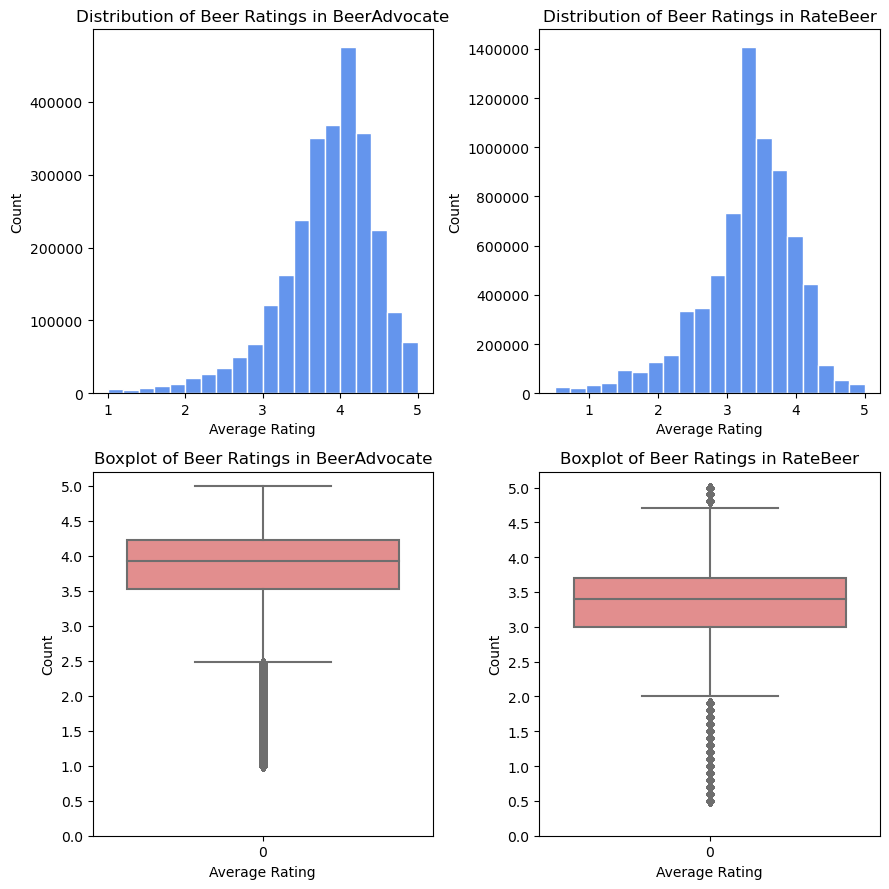

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

# Number of beers in BeerAdvocate and RateBeer
print("Number of beers in BeerAdvocate:", len(ratings_ba_df))
print("Number of beers in RateBeer:", len(ratings_rb_df))

# BeerAdvocate - Histogram
axes[0, 0].hist(ratings_ba_df['rating'], bins=20, color='cornflowerblue', edgecolor='white')
axes[0, 0].set_xlabel('Average Rating')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Beer Ratings in BeerAdvocate')

# RateBeer - Histogram
axes[0, 1].hist(ratings_rb_df['rating'], bins=20, color='cornflowerblue', edgecolor='white')
axes[0, 1].set_xlabel('Average Rating')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Beer Ratings in RateBeer')
axes[0, 1].ticklabel_format(style="plain", axis="y")

# BeerAdvocate - Boxplot
sns.boxplot(ratings_ba_df['rating'], ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_xlabel('Average Rating')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Boxplot of Beer Ratings in BeerAdvocate')
axes[1, 0].set_yticks(np.arange(0, 5.5, 0.5))

# RateBeer - Boxplot
sns.boxplot(ratings_rb_df['rating'], ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Boxplot of Beer Ratings in RateBeer')
axes[1, 1].set_yticks(np.arange(0, 5.5, 0.5))

plt.tight_layout()
plt.show()

As observed from the tables and the plot above, even though the distributions have a similar shape, i.e. normal distribution, they have a different average mean ratings. Indeed, users from the RateBeer dataset seem to be harsher in their ratings. 

Now, as defined above, our popularity definition concerns the number of **good** ratings. A question that arises is: what can be considered as a good rating? 

The ratings are continuous numbers between 0 to 5. One idea is to keep the ratings above the **average mean** of the two datasets and consider them as **good** rating. With this, we take in account the different distribution of the ratings into the two datasets and find a relatively good threshold. 

In [39]:
mean_ba = ratings_ba_df.rating.mean()
mean_rb = ratings_rb_df.rating.mean()

print("Mean rating in BeerAdvocate:", mean_ba)
print("Mean rating in RateBeer:", mean_rb)

Mean rating in BeerAdvocate: 3.8303429745127655
Mean rating in RateBeer: 3.285543157793643


Let's see what are the 10 most rated beer styles in each dataset.

Number of Beer Styles in AdvocateBeer: 104
Number of Beer Styles in RateBeer: 93


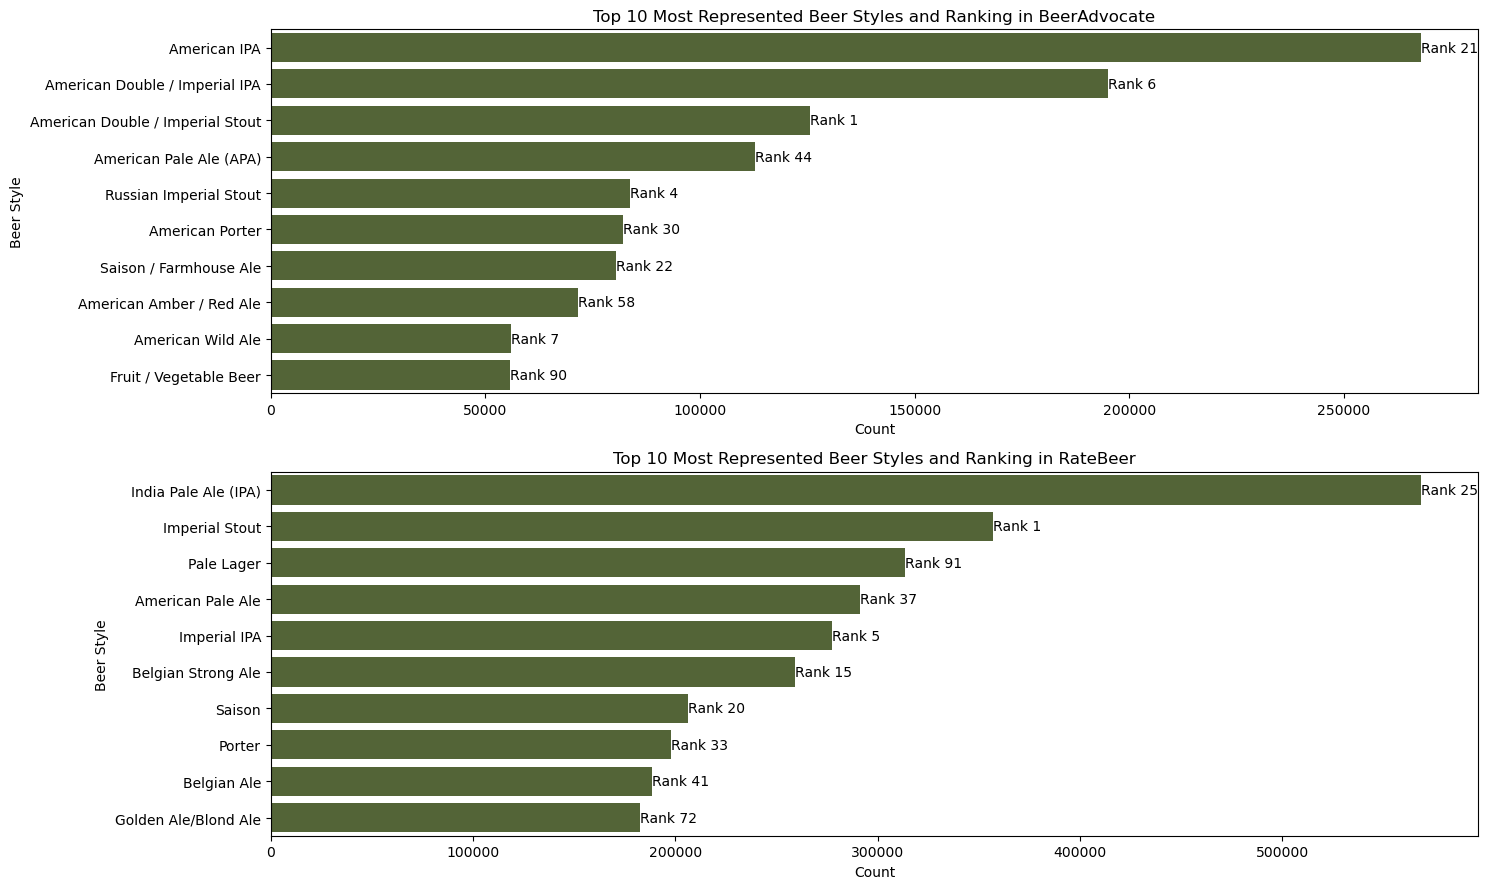

In [40]:
top_ratings_by_style_ba = ratings_ba_df.groupby('style')['rating'].mean().sort_values(ascending=False)
top_ratings_by_style_rb = ratings_rb_df.groupby('style')['rating'].mean().sort_values(ascending=False)

print(f"Number of Beer Styles in AdvocateBeer: {len(top_ratings_by_style_ba)}")
print(f"Number of Beer Styles in RateBeer: {len(top_ratings_by_style_rb)}")

# Number of top beer styles to plot
x = 10

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 6))

# BeerAdvocate
plot1 = sns.countplot(y='style', data=ratings_ba_df, order=ratings_ba_df['style'].value_counts().index[:x], color='darkolivegreen', ax=axes[0])
for i, style in enumerate(ratings_ba_df['style'].value_counts().index[:x]):
    ranking = top_ratings_by_style_ba.index.get_loc(style) + 1  
    plot1.text(ratings_ba_df['style'].value_counts()[i], i, f'Rank {ranking}', va='center')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Beer Style')
axes[0].set_title(f'Top {x} Most Represented Beer Styles and Ranking in BeerAdvocate')

# RateBeer
plot2 = sns.countplot(y='style', data=ratings_rb_df, order=ratings_rb_df['style'].value_counts().index[:x], color='darkolivegreen', ax=axes[1])
for i, style in enumerate(ratings_rb_df['style'].value_counts().index[:x]):
    ranking = top_ratings_by_style_rb.index.get_loc(style) + 1  
    plot2.text(ratings_rb_df['style'].value_counts()[i], i, f'Rank {ranking}', va='center')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Beer Style')
axes[1].set_title(f'Top {x} Most Represented Beer Styles and Ranking in RateBeer')

plt.tight_layout()
plt.show()


From the two plots above we can observe that a beer style can be popular but not have the best rating. For example in the plot of the RateBeer dataset, we see that the  3rd most popular beer style with respect to “count” is the 91th most popular beer style (over 93) when it comes to mean average rating. This finding conforts us in our definition of popularity.

Filtered dataframes to only keep the rating bigger than mean average rating:

In [41]:
ratings_ba_df_untouched = ratings_ba_df.copy()
ratings_rb_df_untouched = ratings_rb_df.copy()

# Filter the ratings dataframes to only keep the popular ratings
ratings_ba_df = ratings_ba_df[ratings_ba_df['rating'] > mean_ba]
ratings_rb_df = ratings_rb_df[ratings_rb_df['rating'] > mean_rb]

### Users' location

Now, let's see how many users each country has

As we have observed that the users are separated by states in the US, we change a bit the users data frame to consider only the US as a country and not as separated states.

In [42]:
users_rb_df['location'] = users_rb_df['location'].str.split(',').str[0]
users_ba_df['location'] = users_ba_df['location'].str.split(',').str[0]

In [43]:
# number of users per country, in RateBeer
rb_user_count_country = users_rb_df.groupby('location')['location'].count().sort_values(ascending=False).reset_index(name='nb users in RateBeer')

# number of users per country, in BeerAdvocate
ba_user_count_country = users_ba_df.groupby('location')['location'].count().sort_values(ascending=False).reset_index(name='nb users in BeerAdvocate')

In [44]:
# merge the two above data frames to count the total number of users per country
users_country = rb_user_count_country.merge(ba_user_count_country, on='location')
users_country['total nb of users'] = users_country['nb users in RateBeer'] + users_country['nb users in BeerAdvocate']
users_country = users_country.sort_values('total nb of users', ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'England'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Poland'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Denmark')])

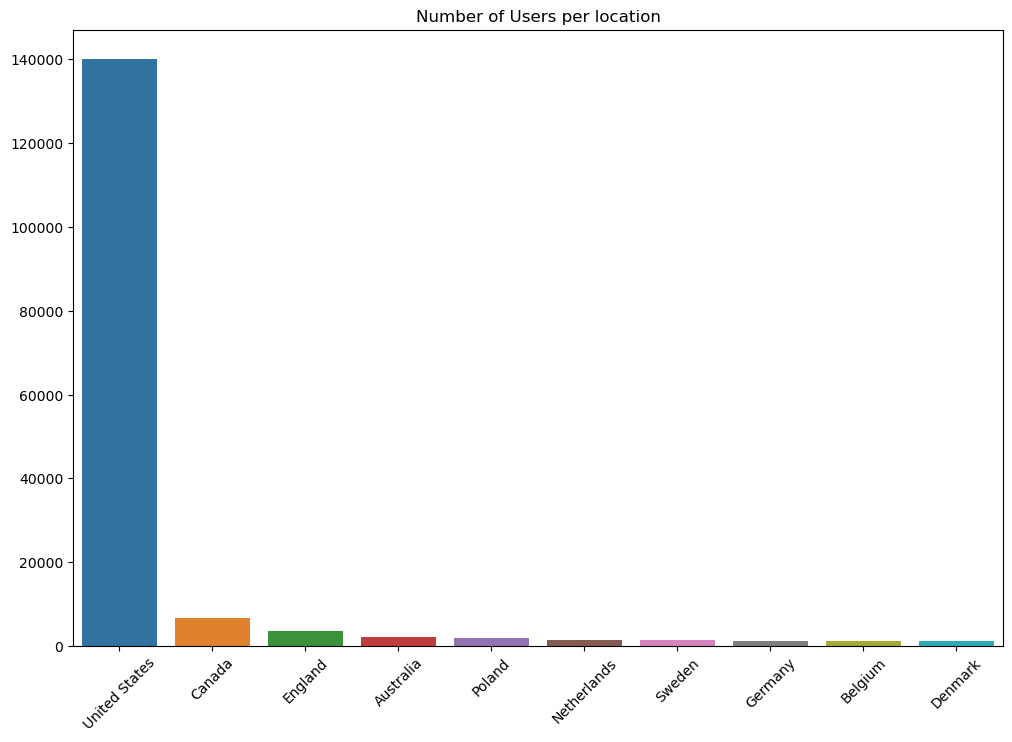

In [45]:
# plotting the distribution
plt.figure(figsize=(12,8))
sns.barplot(x=users_country['location'].values[:10], y=users_country['total nb of users'].values[:10])
plt.title('Number of Users per location')
plt.xticks(rotation=45)

As we see, the US has much more users than the other countries. This leads us to think that by focusing on this country, we will get the most diverse reviews as they come from many different users. If we would consider Canada for example, we could have bias results as there are not so many users and the reviews come from a small set of people, leading us to provide a perfect beer for very few people. For this reason, our analysis will be focused on the US only.

Let's filter to get only US users

In [46]:
US_country = 'United States'

# keep only the rows where the user country is United States
users_ba_df = users_ba_df[users_ba_df.location == US_country]
users_rb_df = users_rb_df[users_rb_df.location == US_country]

# merge the ratings and users data frames to get the location of the user for each rating
ratings_users_ba_df = pd.merge(ratings_ba_df, users_ba_df[['user_id', 'location']], on='user_id', how='inner')
ratings_users_rb_df = pd.merge(ratings_rb_df, users_rb_df[['user_id', 'location']], on='user_id', how='inner')

# filter the ratings dataframes to only keep the popular ratings of the users from the US
ratings_ba_df = ratings_users_ba_df[ratings_users_ba_df.location == US_country]
ratings_ba_df.drop('location', axis=1, inplace=True)
ratings_rb_df = ratings_users_rb_df[ratings_users_rb_df.location == US_country]
ratings_rb_df.drop('location', axis=1, inplace=True)

KeyboardInterrupt: 

## Temporal Analysis

### Top beer styles per months

In [ ]:
# merge the two ratings data frames
ratings_combined_df = pd.concat([ratings_ba_df, ratings_rb_df], ignore_index=True)

In [ ]:
# print all the unique beer styles
unique_styles = sorted(ratings_combined_df['style'].unique())
print(f'Number of unique beer styles: {len(unique_styles)} \n')
for style in unique_styles:
    print(style)

Number of unique beer styles: 178 

Abbey Dubbel
Abbey Tripel
Abt/Quadrupel
Altbier
Amber Ale
Amber Lager/Vienna
American Adjunct Lager
American Amber / Red Ale
American Amber / Red Lager
American Barleywine
American Black Ale
American Blonde Ale
American Brown Ale
American Dark Wheat Ale
American Double / Imperial IPA
American Double / Imperial Pilsner
American Double / Imperial Stout
American IPA
American Malt Liquor
American Pale Ale
American Pale Ale (APA)
American Pale Lager
American Pale Wheat Ale
American Porter
American Stout
American Strong Ale
American Wild Ale
Baltic Porter
Barley Wine
Belgian Ale
Belgian Dark Ale
Belgian IPA
Belgian Pale Ale
Belgian Strong Ale
Belgian Strong Dark Ale
Belgian Strong Pale Ale
Berliner Weissbier
Berliner Weisse
Bitter
Bière de Champagne / Bière Brut
Bière de Garde
Black & Tan
Black IPA
Bock
Braggot
Brown Ale
California Common
California Common / Steam Beer
Chile Beer
Cider
Cream Ale
Czech Pilsener
Czech Pilsner (Světlý)
Doppelbock
Dortmunder /

In [ ]:
# ensure that same beer styles are named the same
ratings_combined_df['style'].replace('Czech Pilsener', 'Czech Pilsner (Světlý)', inplace=True)
ratings_combined_df['style'].replace('Dortmunder / Export Lager', 'Dortmunder/Helles', inplace=True)
ratings_combined_df['style'].replace('Foreign / Export Stout', 'Foreign Stout', inplace=True)
ratings_combined_df['style'].replace('Fruit / Vegetable Beer', 'Fruit Beer', inplace=True)
ratings_combined_df['style'].replace('California Common', 'California Common / Steam Beer', inplace=True)
ratings_combined_df['style'].replace('Märzen / Oktoberfest', 'Oktoberfest/Märzen', inplace=True)
ratings_combined_df['style'].replace('Saison', 'Saison / Farmhouse Ale', inplace=True)
ratings_combined_df['style'].replace('American Pale Ale', 'American Pale Ale (APA)', inplace=True)
ratings_combined_df['style'].replace('Weizen Bock', 'Weizenbock', inplace=True)

Most rated beer beer styles for each month while only considering good ratings

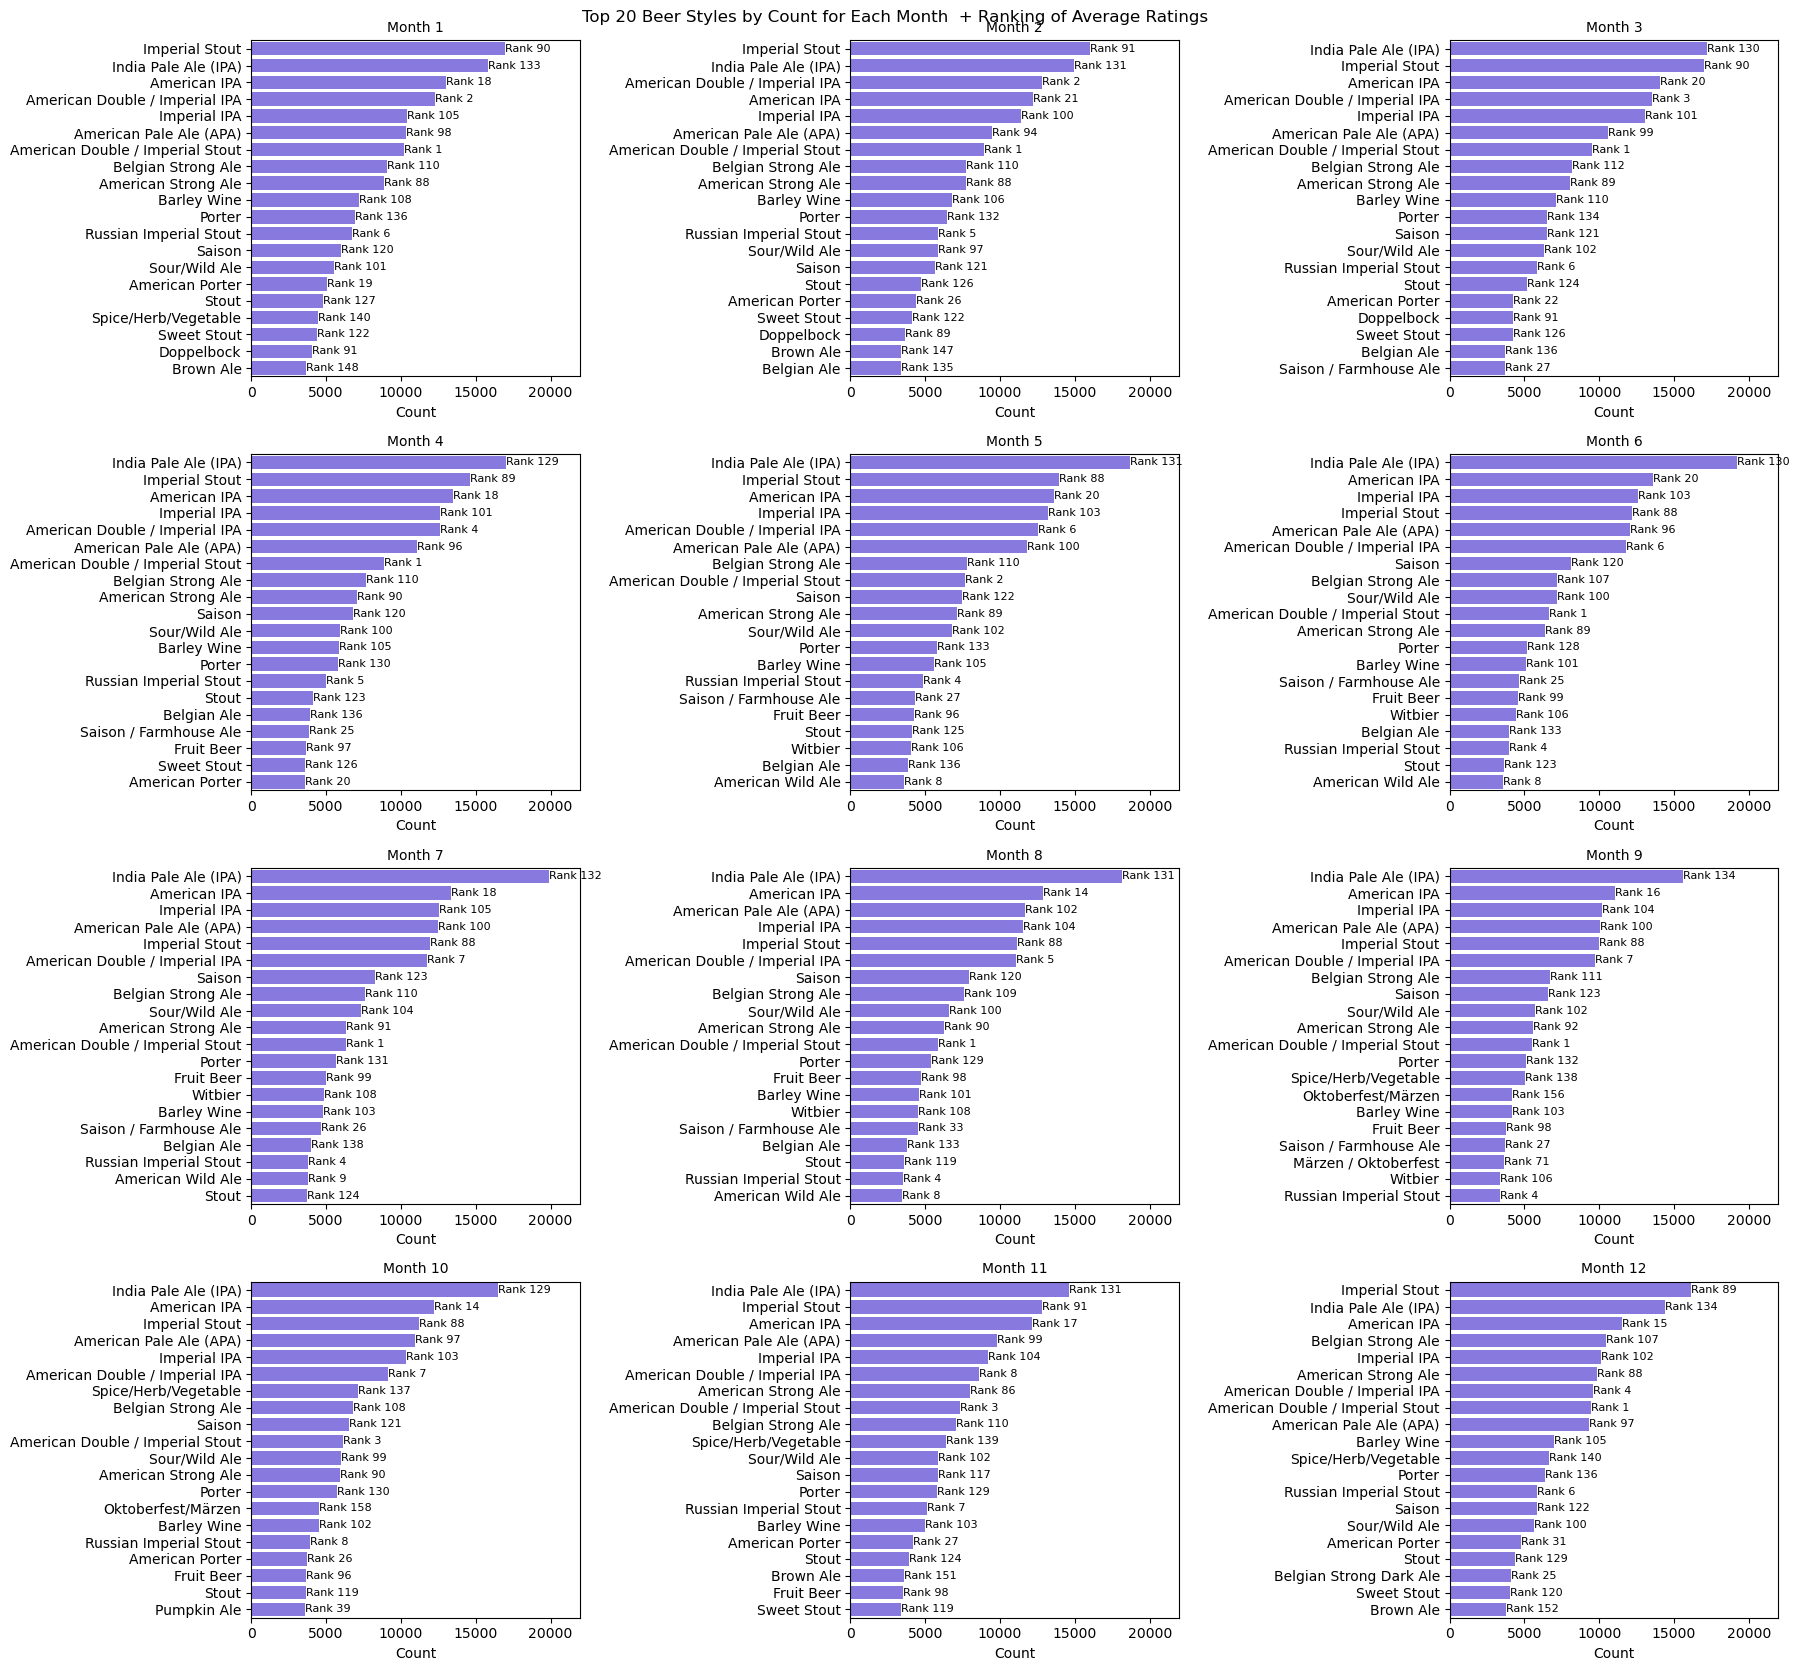

Number of styles that appear in the top 20 for at least one month: 29
Style Occurrences:
American Double / Imperial IPA: 12 times
American Double / Imperial Stout: 12 times
American IPA: 12 times
American Pale Ale (APA): 12 times
American Porter: 7 times
American Strong Ale: 12 times
American Wild Ale: 4 times
Barley Wine: 12 times
Belgian Ale: 7 times
Belgian Strong Ale: 12 times
Belgian Strong Dark Ale: 1 times
Brown Ale: 4 times
Doppelbock: 3 times
Fruit Beer: 8 times
Imperial IPA: 12 times
Imperial Stout: 12 times
India Pale Ale (IPA): 12 times
Märzen / Oktoberfest: 1 times
Oktoberfest/Märzen: 2 times
Porter: 12 times
Pumpkin Ale: 1 times
Russian Imperial Stout: 12 times
Saison: 12 times
Saison / Farmhouse Ale: 7 times
Sour/Wild Ale: 12 times
Spice/Herb/Vegetable: 5 times
Stout: 11 times
Sweet Stout: 6 times
Witbier: 5 times


In [ ]:
# Number of top beer styles to plot
x = 20

fig, axes = plt.subplots(4, 3, figsize=(18, 17))
fig.suptitle(f'Top {x} Beer Styles by Count for Each Month  + Ranking of Average Ratings')

max_count_across_months = ratings_combined_df.groupby('month')['style'].value_counts().head(x).max()
style_occurrences = {style: 0 for style in unique_styles}

for month, ax in zip(range(1, 13), axes.flatten()):
    month_data = ratings_combined_df[ratings_combined_df['month'] == month]
    top_styles_by_count = month_data['style'].value_counts().head(x).index
    avg_ratings_by_style = month_data.groupby('style')['rating'].mean().sort_values(ascending=False)

    # Count the number of times each style appears in the top 20 for each month
    for style in top_styles_by_count:
        style_occurrences[style] += 1

    sns.countplot(y='style', data=month_data, order=top_styles_by_count, ax=ax, color='mediumslateblue')
    ax.set_title(f'Month {month}', fontsize=10)
    ax.set_xlabel('Count')
    ax.set_ylabel('')
    ax.set_xlim(0, max_count_across_months + 5000)
    for i, style in enumerate(top_styles_by_count):
        ranking = avg_ratings_by_style.index.get_loc(style) + 1
        ax.text(month_data['style'].value_counts()[i], i, f'Rank {ranking}', va='center', ha='left', color='black', fontsize=8)

plt.tight_layout()
plt.show()

# Print the style occurrences dictionary and remove styles that never appear in the top 20
style_occurrences = {style: count for style, count in style_occurrences.items() if count > 0}
print("Number of styles that appear in the top 20 for at least one month:", len(style_occurrences))
print("Style Occurrences:")
for style, count in style_occurrences.items():
    print(f"{style}: {count} times")


# to put at the end

In order to analyze the reviews of users, we create dictionaries that contain key words that are commonly used to describe some aspects of a beer. From these dictionaries, we look for the keywords in the reviews and we will then analyze more in depth wether it is used with in a positive or negative way. At the end of this part, we should be able to get the best aroma, taste, palate, and other perfect beer caracteristics for each month.


First, let's define our dictionaries and look wether they are relevant or not by looking at the distribution of key words in the reviews.

In [ ]:
aroma = ('Malty, biscuity, breadlike, grainy, rich, deep, roasty, cereal, cookie-like, coffeeish, caramelly, toffee-like, molasses-like, malt complexity, smoky, sweet, autumnal, burnt cream, scalded milk, oatmeal, rustic, layered'.split(',')) + ('Piney, citrusy, grapefruity, earthy, musty, spicy, sharp, bright, fresh, herbal, zippy, lemony, newly-mown lawn, aromatic, floral, springlike, brilliant, sprucelike, juniper-like, minty, pungent, elegant, grassy'.split(','))
color = 'pale straw, staw, pale gold, deep gold, pale amber, medium amber, deep amber, amber brown, brown, ruby brown, deep brown, black'.split(',')


In [ ]:
aroma_dict = {x:0 for x in aroma}
color_dict = {x:0 for x in color}

In [ ]:
# extracting texts
texts_RB = []
with open('data/RateBeer/reviews_RateBeer.txt') as f:
    for i,l in enumerate(f):
        splitted = l.split(':')
        if 'text' in splitted[0]:
            texts_RB.append(splitted[1].replace('\n',''))

FileNotFoundError: [Errno 2] No such file or directory: 'data/RateBeer/reviews_RateBeer.txt'

In [ ]:
texts_BA = []
with open('data/BeerAdvocate/reviews_BeerAdvocate.txt') as f:
    for i,l in enumerate(f):
        splitted = l.split(':')
        if 'text' in splitted[0]:
            texts_BA.append(splitted[1].replace('\n',''))

FileNotFoundError: [Errno 2] No such file or directory: 'data/BeerAdvocate/reviews_BeerAdvocate.txt'

In [ ]:
texts = texts_BA + texts_RB

In [ ]:
key_words_lists = [aroma, color]
key_words_dict = [aroma_dict, color_dict]
categories = ["Aroma", "Color"]

In [ ]:
for i, ls in enumerate(key_words_lists):
    current_dict = key_words_dict[i]
    
    for w in ls:
        for text in texts:
            if w in text:
                current_dict[w] += 1

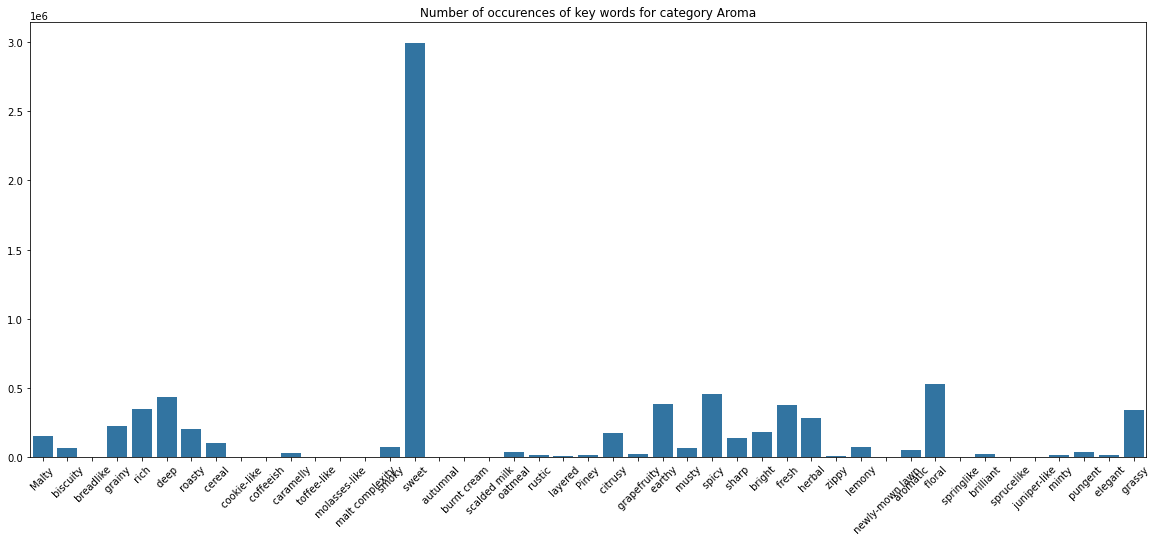

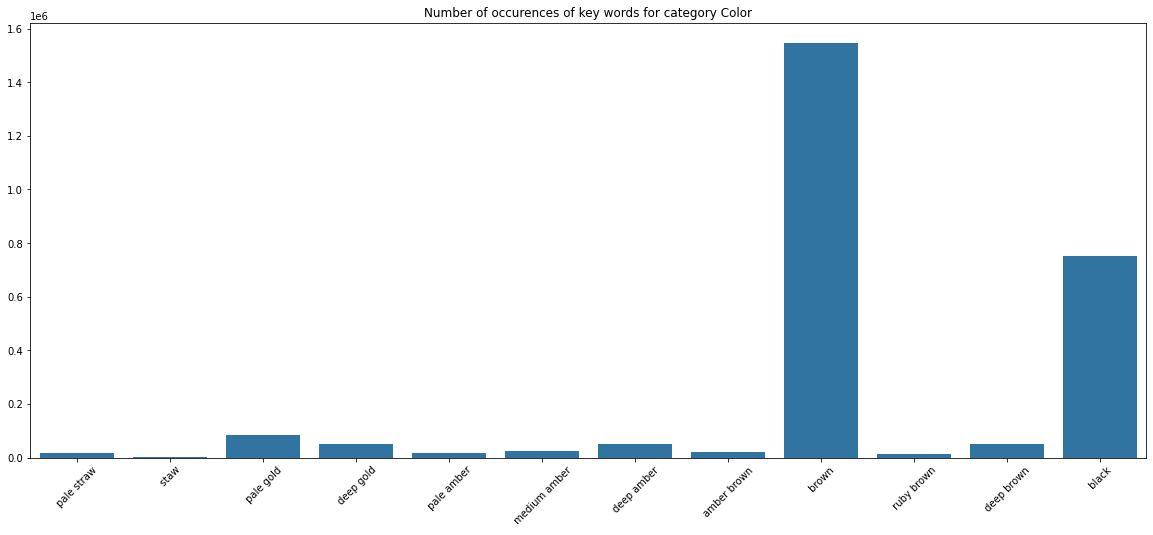

In [ ]:
# plotting the occurences per catefory
for i,d in enumerate(key_words_dict):
    category = categories[i]
    plt.figure(figsize=(20,8))
    sns.barplot(x=d.keys(), y=d.values())
    plt.title('Number of occurences of key words for category ' + category)
    plt.xticks(rotation=45)

As we see, in aroma, "sweet" is much more present than the other key words and in color "brown" dominates. Let's remove them to have a better idea of the plot for the other key words.

In [ ]:
sweet = aroma_dict.pop('sweet')
brown = color_dict.pop(' brown')

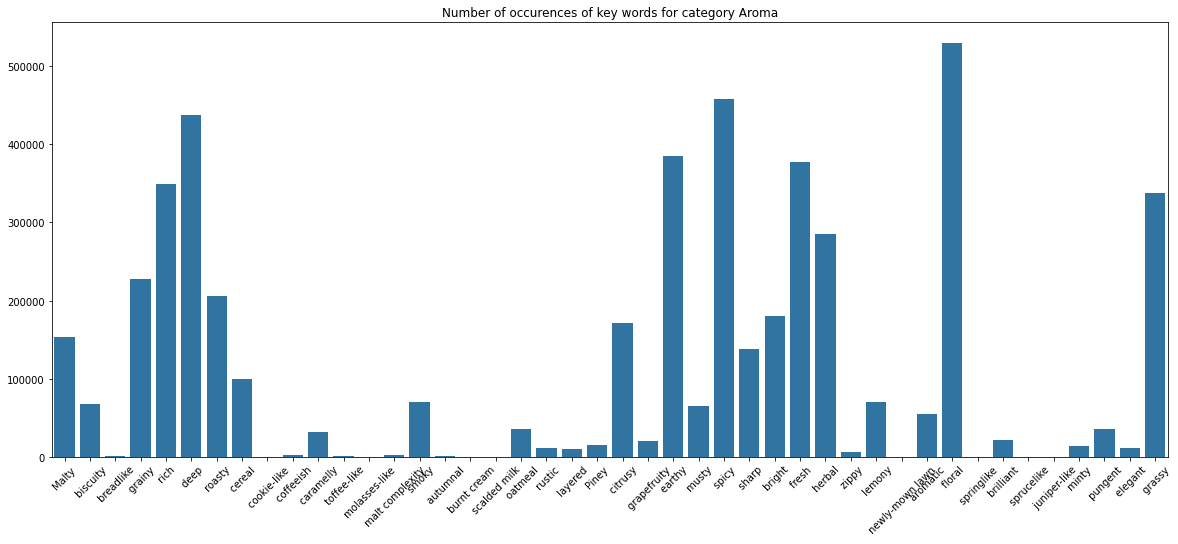

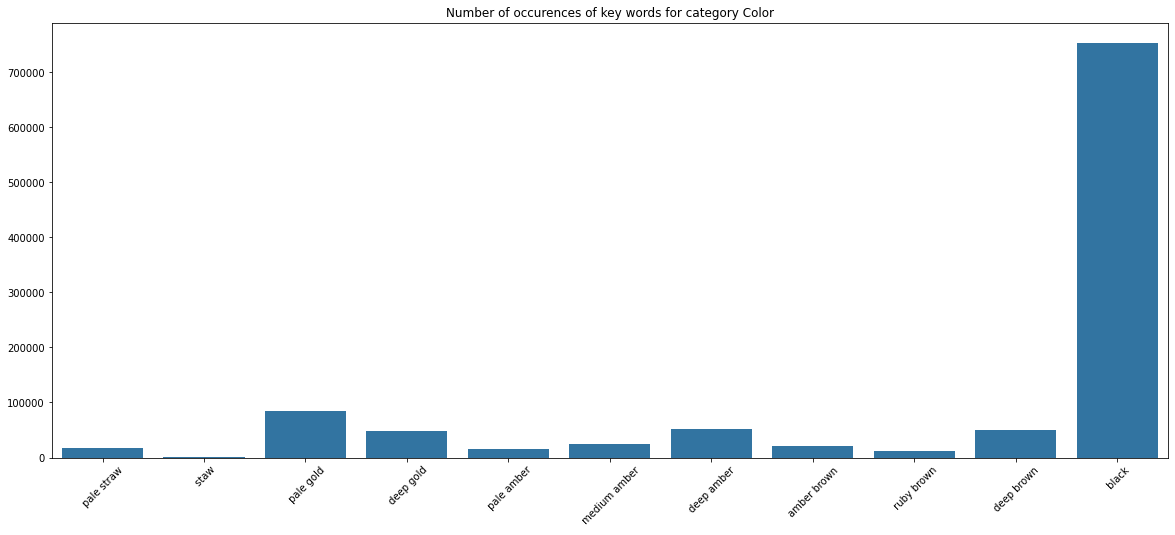

In [ ]:
# plotting the occurences per category
for i,d in enumerate(key_words_dict):
    category = categories[i]
    plt.figure(figsize=(20,8))
    sns.barplot(x=d.keys(), y=d.values())
    plt.title('Number of occurences of key words for category ' + category)
    plt.xticks(rotation=45)